In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib as mpl
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False
rc("font", family="Malgun Gothic")
get_ipython().run_line_magic("matplotlib", "inline")

In [2]:
data = pd.read_excel("../ds_study/data/reviews_concat.xlsx", index_col=0)
data

,platform,store,date,review,rating,category,label
0,mustit,google,20230914,굿,5,만족도&기타,1
1,balaan,google,20230914,자주 이용하지는 않지만 기분전환으로 조그만거 하나씩 사고 있어요,5,만족도&기타,1
2,balaan,google,20230914,가격이 싸니까 직접 포장해서 줘요,5,가격&프로모션,1
3,balaan,google,20230914,포장이 안돼서 오는게 좀 그렇지만,5,상품 품질,0
4,balaan,google,20230914,앱깔고 눈팅만 하다가 전부터 사고싶던게 특가로 떠서 샀어요,5,가격&프로모션,1
...,...,...,...,...,...,...,...
13361,mustit,google,20141028,좋아요,5,만족도&기타,1
13362,mustit,google,20140805,너무 좋아요,5,만족도&기타,1
13363,mustit,google,20140703,좋습니다,5,만족도&기타,1
13364,mustit,google,20140530,좋아요,5,만족도&기타,1


In [3]:
data.dtypes

platform    object
store       object
date         int64
review      object
rating       int64
category    object
label        int64
dtype: object

In [4]:
# 긍정/부정 컬럼 추가

data['긍/부'] = None

for idx, row in data.iterrows():
    if row.label == 1:
        data['긍/부'][idx] = '긍정'
    else:
        data['긍/부'][idx] = '부정'

data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_4392\3260447740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['긍/부'][idx] = '긍정'
C:\Users\user\AppData\Local\Temp\ipykernel_4392\3260447740.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['긍/부'][idx] = '부정'


,platform,store,date,review,rating,category,label,긍/부
0,mustit,google,20230914,굿,5,만족도&기타,1,긍정
1,balaan,google,20230914,자주 이용하지는 않지만 기분전환으로 조그만거 하나씩 사고 있어요,5,만족도&기타,1,긍정
2,balaan,google,20230914,가격이 싸니까 직접 포장해서 줘요,5,가격&프로모션,1,긍정
3,balaan,google,20230914,포장이 안돼서 오는게 좀 그렇지만,5,상품 품질,0,부정
4,balaan,google,20230914,앱깔고 눈팅만 하다가 전부터 사고싶던게 특가로 떠서 샀어요,5,가격&프로모션,1,긍정


In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [11]:
pos_reviews= data[(data['label'] == 1) & (data['platform'] == 'trenbe')]
neg_reviews= data[(data['label'] == 0) & (data['platform'] == 'trenbe')]

In [13]:
import re
#-- 긍정 리뷰
pos_reviews['review'] = pos_reviews['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))
#-- 부정 리뷰
neg_reviews['review'] = neg_reviews['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

C:\Users\user\AppData\Local\Temp\ipykernel_4392\3095809196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_reviews['review'] = pos_reviews['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))
C:\Users\user\AppData\Local\Temp\ipykernel_4392\3095809196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_reviews['review'] = neg_reviews['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))


In [14]:
import jpype
from konlpy.tag import Okt
okt = Okt()

pos_comment_nouns = []
for cmt in pos_reviews['review']:
    pos_comment_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
pos_comment_nouns2 = []
word = [w for w in pos_comment_nouns if len(w) > 1]  
pos_comment_nouns2.extend(word)

In [15]:
pos_comment_nouns2

['살때',
 '어디가',
 '구찌',
 '제품',
 '고급',
 '지면',
 '의상',
 '장소',
 '제품',
 '더욱',
 '소장',
 '중고',
 '고지',
 '여기',
 '물건',
 '살때',
 '백만',
 '고민',
 '백화점',
 '제품',
 '상세',
 '설명',
 '버그',
 '수정',
 '업데이트',
 '구매',
 '브랜드',
 '가격',
 '구매',
 '사용',
 '실제',
 '가방',
 '하나',
 '사서',
 '장바구니',
 '물건',
 '바로',
 '가요',
 '아주',
 '기능',
 '상품',
 '할인',
 '상품',
 '할인',
 '상품',
 '트렌비',
 '물건',
 '요트',
 '렌비',
 '구매',
 '쇼핑',
 '클릭',
 '롸잇',
 '나우',
 '사용',
 '명품',
 '판매',
 '정리',
 '제품',
 '정리',
 '명품',
 '쇼핑',
 '가능',
 '검색',
 '필터',
 '장점',
 '가품',
 '사용',
 '중이',
 '제품',
 '가장',
 '최종',
 '구매',
 '트렌비',
 '명품',
 '구매',
 '대행',
 '비교',
 '요즘',
 '사이즈',
 '가격',
 '사진',
 '가장',
 '자주',
 '이용',
 '정품',
 '안심',
 '자주',
 '이용',
 '플랫폼',
 '대비',
 '제품',
 '최저',
 '배송',
 '굿굿',
 '오늘',
 '트렌비',
 '어플',
 '설치',
 '주문',
 '구매',
 '대행',
 '어플',
 '상품',
 '여기',
 '거기',
 '배송비',
 '수비',
 '배송비',
 '수비',
 '믿음',
 '가격',
 '합리',
 '트렌비',
 '번창',
 '가격',
 '때문',
 '직구',
 '배송',
 '오류',
 '때문',
 '스트레스',
 '요즘',
 '국내',
 '사이트',
 '비교',
 '구매',
 '진짜',
 '배송비',
 '무료',
 '다가',
 '일주일',
 '도착',
 '제품',
 '검수',
 '정품',
 '인증',
 '믿음',
 '듭니',
 '개인',


In [16]:
from collections import Counter
pos_word_count = Counter(pos_comment_nouns2)

pos_word_count
if '트렌비' in pos_word_count:
    pos_word_count.pop('트렌비')

In [17]:
max = 20
pos_top_20 = {}
for word, counts in pos_word_count.most_common(max):
    pos_top_20[word] = counts
    print(f'{word} : {counts}')

구매 : 1349
제품 : 1088
명품 : 831
가격 : 752
배송 : 605
쇼핑 : 520
백화점 : 484
할인 : 457
브랜드 : 450
정품 : 425
상품 : 326
어플 : 323
이용 : 316
비교 : 277
하나 : 265
사용 : 255
진짜 : 249
자주 : 231
생각 : 228
해외 : 218


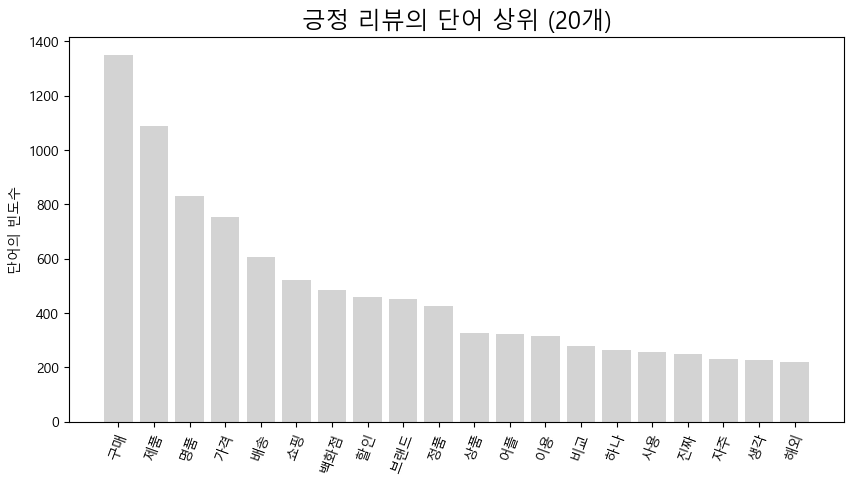

In [24]:
plt.figure(figsize=(10, 5))
plt.title('긍정 리뷰의 단어 상위 (%d개)' % max, fontsize=17)    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in pos_top_20.items():
    if key == '트렌비': continue
    plt.bar(key, value, color='lightgrey') 
plt.show()

상품 : 160
업데이트 : 143
고객 : 120
취소 : 117
구매 : 112
배송 : 111
환불 : 105
계속 : 103
주문 : 92
센터 : 91
반품 : 91
화면 : 80
제품 : 79
그냥 : 74
물건 : 70
문의 : 70
어플 : 67
연락 : 64
가격 : 64
판매 : 62


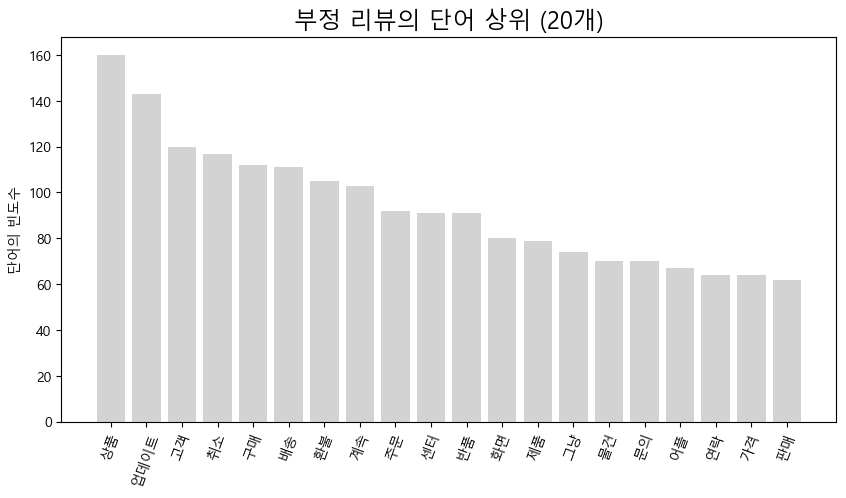

In [35]:
#-- 부정 리뷰 명사 추출
neg_comment_nouns = []
for cmt in neg_reviews['review']:
    neg_comment_nouns.extend(okt.nouns(cmt)) 

neg_comment_nouns2 = []
word = [w for w in neg_comment_nouns if len(w) > 1]  
neg_comment_nouns2.extend(word)  
    
#-- 단어 빈도 계산
neg_word_count = Counter(neg_comment_nouns2)

if '트렌비' in neg_word_count:
    neg_word_count.pop('트렌비')
#-- 빈도수가 많은 상위 20개 단어 추출
neg_top_20 = {}
for word, counts in neg_word_count.most_common(max):
    neg_top_20[word] = counts
    print(f'{word} : {counts}')

#-- 그래프 작성
plt.figure(figsize=(10, 5))
plt.title('부정 리뷰의 단어 상위 (%d개)' % max, fontsize=17)    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in neg_top_20.items():
    if key == '트렌비': continue
    plt.bar(key, value, color='lightgrey') 
plt.show()

In [36]:
from wordcloud import WordCloud

In [37]:
font_path = "C:/Windows/Fonts/malgun.ttf"

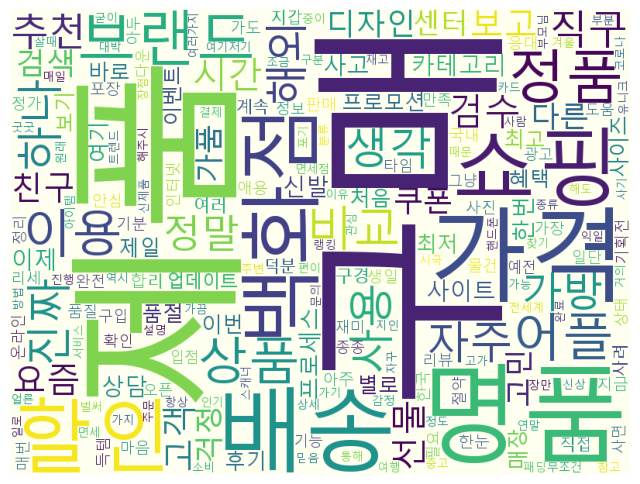

In [38]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(pos_word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

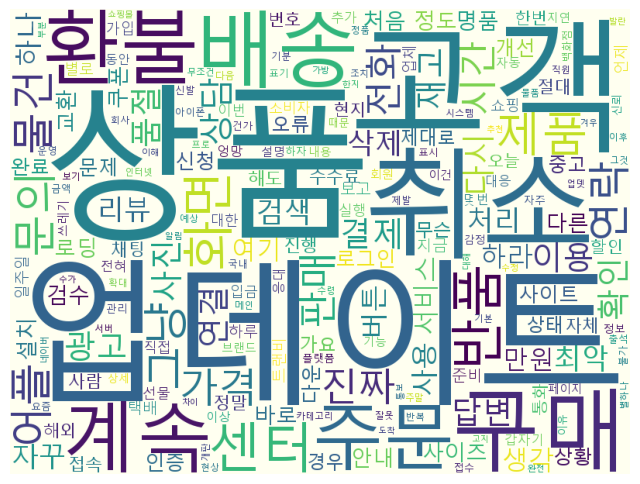

In [39]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(neg_word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()